# ResNet

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
# check if gpu present
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Datasets and transforms

In [3]:
# earlier had used ToTensor() of "transform" to convert PIL image to tensor directly
# This time using few more functions of "transform"

transform_train = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

Downloading and applying the transform object pipelined above

In [4]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, 
                                        transform = transform_train) # applying transform in this last line

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                        download = True, 
                                        transform = transform_test)
                                        

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
num_classes = 10

# Helper Functions

In [12]:
def evaluation(dataloader, model):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1) # index at which max value
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [24]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle = False)

# ResNet Model

This time use pre-trained model

In [25]:
from torchvision import models

In [26]:
resnet = models.resnet18(pretrained=True)

In [27]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Note each "BasicBlock" has the same set of layers

In [28]:
for param in resnet.parameters():
  param.requires_grad = False
# pretrained so don't learn again

In [29]:
# change number of classes in last layer (make it 10)
in_features = resnet.fc.in_features # input remains 512
resnet.fc = nn.Linear(in_features, num_classes)

In [30]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


Thus only last layer learnt

In [31]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(resnet.parameters(), lr = 0.01) # stochastic

In [32]:
import copy

Min loss 2.36
Iteration: 0/3125, Loss: 2.36
Min loss 2.06
Min loss 1.91
Min loss 1.90
Min loss 1.80
Min loss 1.80
Min loss 1.76
Min loss 1.64
Min loss 1.60
Iteration: 100/3125, Loss: 2.08
Min loss 1.44
Min loss 1.38
Min loss 1.35
Iteration: 200/3125, Loss: 1.74
Min loss 1.27
Min loss 1.17
Min loss 1.15
Iteration: 300/3125, Loss: 1.67
Min loss 1.03
Min loss 0.98
Iteration: 400/3125, Loss: 1.40
Iteration: 500/3125, Loss: 1.04
Min loss 0.95
Iteration: 600/3125, Loss: 1.32
Iteration: 700/3125, Loss: 1.09
Min loss 0.84
Min loss 0.83
Min loss 0.81
Iteration: 800/3125, Loss: 1.42
Iteration: 900/3125, Loss: 1.29
Min loss 0.76
Iteration: 1000/3125, Loss: 1.07
Iteration: 1100/3125, Loss: 1.91
Min loss 0.74
Min loss 0.69
Iteration: 1200/3125, Loss: 0.88
Iteration: 1300/3125, Loss: 0.97
Iteration: 1400/3125, Loss: 1.16
Min loss 0.62
Iteration: 1500/3125, Loss: 1.62
Iteration: 1600/3125, Loss: 1.19
Iteration: 1700/3125, Loss: 0.91
Iteration: 1800/3125, Loss: 0.96
Min loss 0.58
Iteration: 1900/3125,

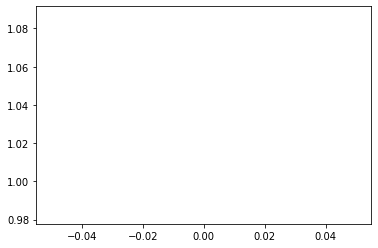

Iteration: 0/3125, Loss: 1.73
Iteration: 100/3125, Loss: 1.07
Iteration: 200/3125, Loss: 1.79
Iteration: 300/3125, Loss: 0.62
Iteration: 400/3125, Loss: 1.03
Iteration: 500/3125, Loss: 1.22
Iteration: 600/3125, Loss: 1.26
Iteration: 700/3125, Loss: 1.77
Iteration: 800/3125, Loss: 0.55
Iteration: 900/3125, Loss: 0.97
Iteration: 1000/3125, Loss: 1.17
Iteration: 1100/3125, Loss: 0.82
Iteration: 1200/3125, Loss: 0.90
Iteration: 1300/3125, Loss: 1.46
Min loss 0.47
Iteration: 1400/3125, Loss: 1.21
Iteration: 1500/3125, Loss: 1.27
Iteration: 1600/3125, Loss: 1.59
Iteration: 1700/3125, Loss: 0.79
Iteration: 1800/3125, Loss: 1.06
Iteration: 1900/3125, Loss: 0.90
Iteration: 2000/3125, Loss: 1.15
Iteration: 2100/3125, Loss: 1.28
Iteration: 2200/3125, Loss: 1.44
Iteration: 2300/3125, Loss: 1.03
Iteration: 2400/3125, Loss: 1.56
Iteration: 2500/3125, Loss: 1.00
Iteration: 2600/3125, Loss: 1.36
Iteration: 2700/3125, Loss: 1.16
Iteration: 2800/3125, Loss: 1.77
Iteration: 2900/3125, Loss: 1.14
Iteratio

In [ ]:
loss_epoch_arr = []
max_epochs = 4

n_iters = np.ceil(50000/batch_size)

# checkpointing
min_loss = 1000

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = resnet(inputs)
    loss = loss_fn(outputs, labels)

    loss.backward() 
    opt.step() 

    if loss.item() < min_loss: # loss.item is the current loss
      min_loss = loss.item() 
      best_model = copy.deepcopy(resnet.state_dict()) # state_dict has all params of model
      print("Min loss %0.2f" % min_loss)

    if i%100 == 0:
      print("Iteration: %d/%d, Loss: %0.2f" % (i, n_iters, loss.item()))

    del inputs, labels, outputs
    torch.cuda.empty_cache()


  loss_epoch_arr.append(loss.item())

  print("Epoch: %d/%d, Test acc = %0.2f, Train acc = %0.2f" %(
      epoch, max_epochs,
      evaluation(testloader, resnet), evaluation(trainloader, resnet)))
  
  plt.plot(loss_epoch_arr)
  plt.show()

Note each checkpointing results in a lower loss each time.

Also note: loss way lesser than VGG Net.

In [ ]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader, resnet), evaluation(testloader, resnet))